# Exploratory Data Analysis- D207

#### Id No.: 010756950 
#### Mentor: David Gagner
#### Date: 12/17/2022

### A1. Question for Analysis:

Which variables are most important to predict which customers are at high risk of churn?

### A2. Benefit from Analysis:

Stakeholders in the organization will benefit from an analysis of the data because it gives a clear insight of which customers are at high risk of churn. This will help in better decision making which improve the business performance and also enhance the services to the customers. 

### A3. Data Identification:

The dependent variable "Churn" which is categorial variables with two values "Yes" or "No", is identified as the most relevant variables which helps in making decision for an analysis.

The continuous numerical variables are:
   - Tenure: Number of months the customer has stayed with the provider.
   - MonthlyCharge: The amount charged to the customer monthly.
   - Bandwidth_GB_Year: Average amount of data used, in GB, in a year by the customer.
   
Lastly, customers provided ordinal numerical data from the survey responses by rating 8 customer service factors on a scale of 1 to 8 (1 = most important, 8 - Least important)

   - Item1: integer value indicating timely response

   - Item2: integer value indicating timely fixes

   - Item3: integer value indicating timely replacements

   - Item4: integer value indicating reliability

   - Item5: integer value indicating options

   - Item6: integer value indicating respectful response

   - Item7: integer value indicating courteous exchange

   - Item8: integer value indicating evidence of active listening

### B1. Code:
Chi-square testing will be used.

In [1]:
#import packages
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import chisquare
from scipy.stats import chi2_contingency

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
#load dataset into pandas DataFrame
df_churn = pd.read_csv('churn_clean.csv')

In [3]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
# Rename last 8 survey columns for better description of variables
df_churn.rename(columns = {'Item1':'TimelyResponse',
                           'Item2':'TimelyFixes',
                           'Item3':'TimelyReplacements',
                           'Item4':'Reliability',
                           'Item5':'Options',
                           'Item6':'RespectfulResponses',
                           'Item7':'CourteousExchange',
                           'Item8':'ActiveListening'},
                inplace=True)

In [5]:
df_churn.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,TimelyFixes,TimelyReplacements,Reliability,Options,RespectfulResponses,CourteousExchange,ActiveListening
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [6]:
#Creating Contingency table to compare 2 variables Churn & Timely Response
contingency = pd.crosstab(df_churn['Churn'], df_churn['TimelyResponse'])
contingency

TimelyResponse,1,2,3,4,5,6,7
Churn,,,,,,,
No,158,1002,2562,2473,994,146,15
Yes,66,391,886,885,365,53,4


In [7]:
contingency_pct = pd.crosstab(df_churn['Churn'], df_churn['TimelyResponse'], normalize='index')
contingency_pct

TimelyResponse,1,2,3,4,5,6,7
Churn,,,,,,,
No,0.021497,0.136327,0.348571,0.336463,0.135238,0.019864,0.002041
Yes,0.024906,0.147547,0.334340,0.333962,0.137736,0.020000,0.001509


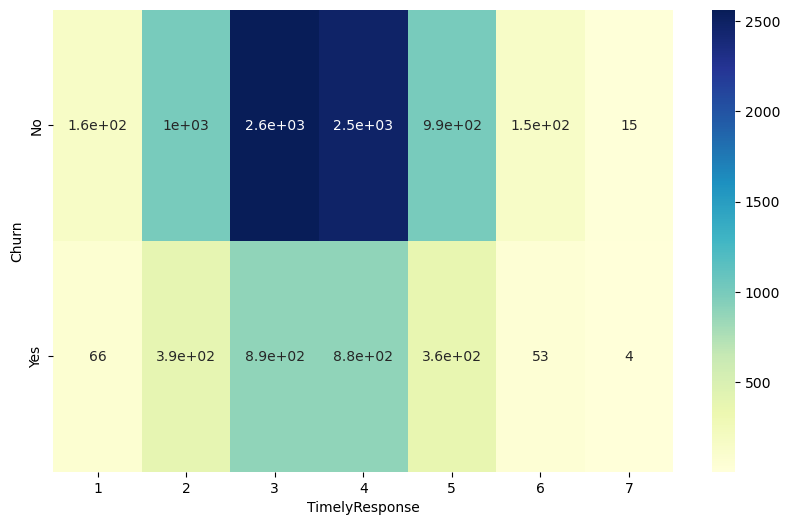

In [8]:
#Creating Heatmap for data Visualization of Churn & Timely Response
plt.figure(figsize=(10,6))
sns.heatmap(contingency, annot=True, cmap="YlGnBu")
plt.show()

### B2. Output:

In [9]:
# Chi-square test of independence
c, p, dof, expected = chi2_contingency(contingency)
print("The p-value is " + str(p))

The p-value is 0.6318335816054494


### B3. Justification:

The chi-square test is a best choice which helps an organization to better understand and interpret the relationship between two categorical variables. Here, the categorial dependent variable is churn. The other categorial variables are Timely Response, Courteous Exchange. This analysis determines whether the expectected and observed variable are well fitting.

### C. Univariate Statistics

#### Identify the distribution of two continuous variables and two categorical variables using univariate statistics from your cleaned and prepared data. 

Two continuous variables:

   - MonthlyCharge

   - Bandwidth_GB_Year 

Two categorical (ordinal) variables:

   - Timely Response

   - Courteous Exchange



### C1. Visual of Findings:

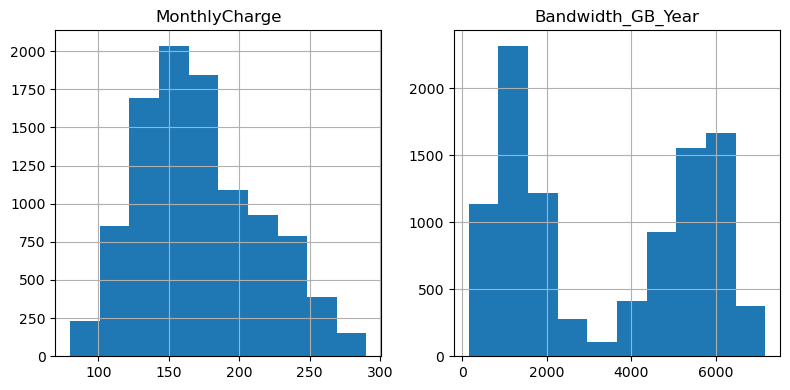

In [10]:
# Create histograms of contiuous variables
df_churn[['MonthlyCharge', 'Bandwidth_GB_Year']].hist(figsize = (8,4))
plt.savefig('univariate_continuous.jpg')
plt.tight_layout()

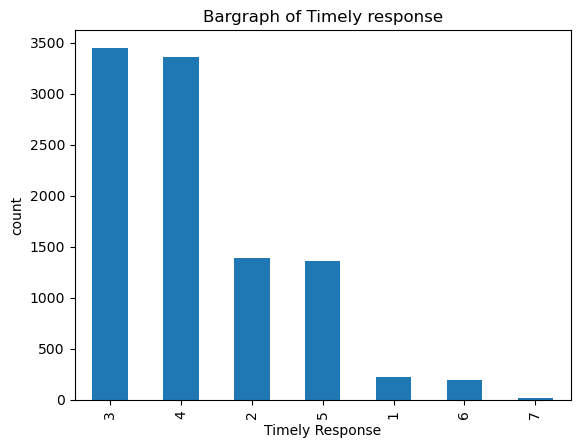

In [11]:
# Create bargraph of categorial variables: Timely Response
df_churn['TimelyResponse'].value_counts().plot(kind = 'bar')
plt.xlabel('Timely Response')
plt.ylabel('count')
plt.title('Bargraph of Timely response')
plt.savefig('univariate_categorial_TR.jpg')
plt.show()

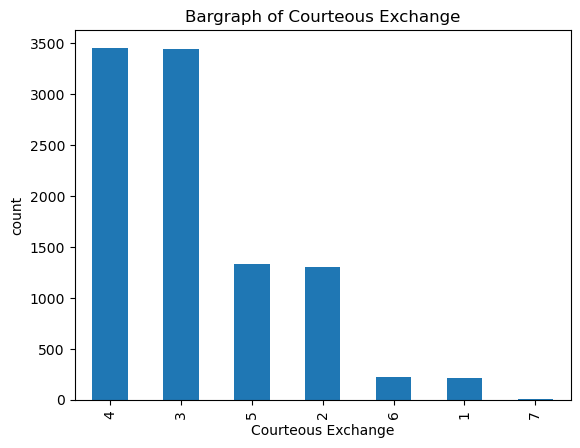

In [12]:
# Create bargraph of categorial variables: Courteous Exchange
df_churn['CourteousExchange'].value_counts().plot(kind = 'bar')
plt.xlabel('Courteous Exchange')
plt.ylabel('count')
plt.title('Bargraph of Courteous Exchange')
plt.savefig('univariate_categorial_CE.jpg')
plt.show()

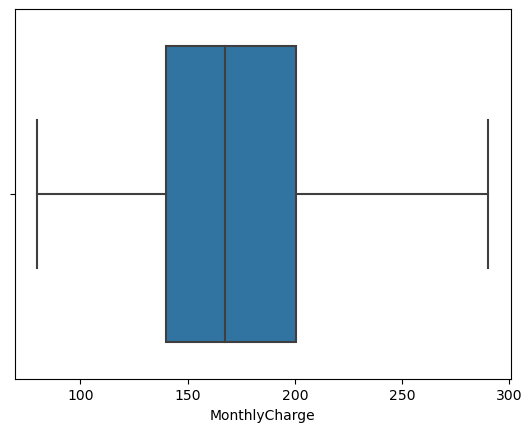

In [13]:
# Display boxplots for continuous variables MonthlyCharge and Bandwidth_GB_Year
sns.boxplot('MonthlyCharge', data = df_churn)
plt.show()

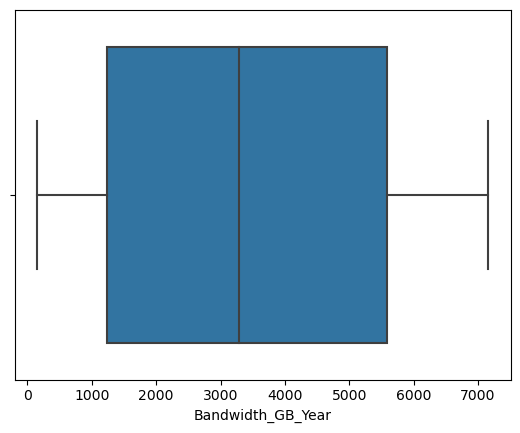

In [14]:
sns.boxplot('Bandwidth_GB_Year', data = df_churn)
plt.show()

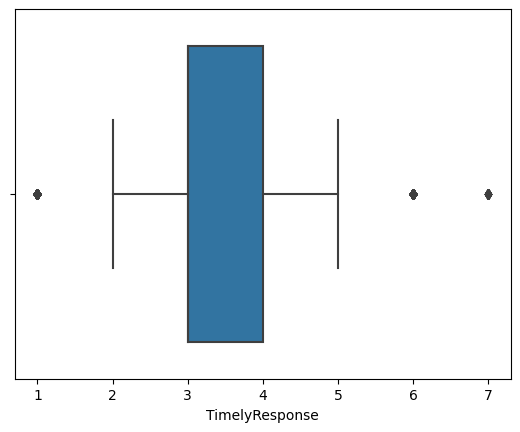

In [15]:
# Display boxplots for categorial variables Timely Response and Courteous Exchange
sns.boxplot('TimelyResponse', data = df_churn)
plt.show()

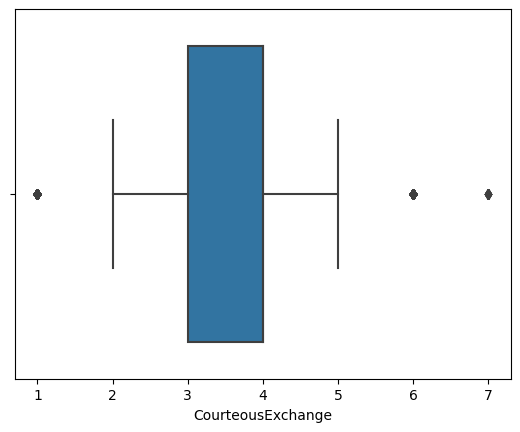

In [16]:
sns.boxplot('CourteousExchange', data = df_churn)
plt.show()

### D. Bivariate Statistics

#### Identify the distribution of two continuous variables and two categorical variables using bivariate statistics from your cleaned and prepared data.

Two continuous variables:

   - MonthlyCharge

   - Bandwidth_GB_Year 

Two categorical variables:

   - Churn

   - CourteousExchange

### D1. Visual of Findings:

In [17]:
#Display dataframe for heatmap bivariate analysis of correlation
df_bivariate = df_churn[['MonthlyCharge', 'Bandwidth_GB_Year', 'TimelyResponse', 'CourteousExchange']]
df_bivariate

,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,CourteousExchange
0,172.455519,904.536110,5,3
1,242.632554,800.982766,3,4
2,159.947583,2054.706961,4,3
3,119.956840,2164.579412,4,3
4,149.948316,271.493436,4,4
...,...,...,...,...
9995,159.979400,6511.252601,3,2
9996,207.481100,5695.951810,4,2
9997,169.974100,4159.305799,4,4
9998,252.624000,6468.456752,4,5


In [18]:
#Display correlation matrix
df_bivariate.corr()

,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,CourteousExchange
MonthlyCharge,1.000000,0.060406,0.009756,-0.006399
Bandwidth_GB_Year,0.060406,1.000000,-0.007314,-0.001077
TimelyResponse,0.009756,-0.007314,1.000000,0.336782
CourteousExchange,-0.006399,-0.001077,0.336782,1.000000


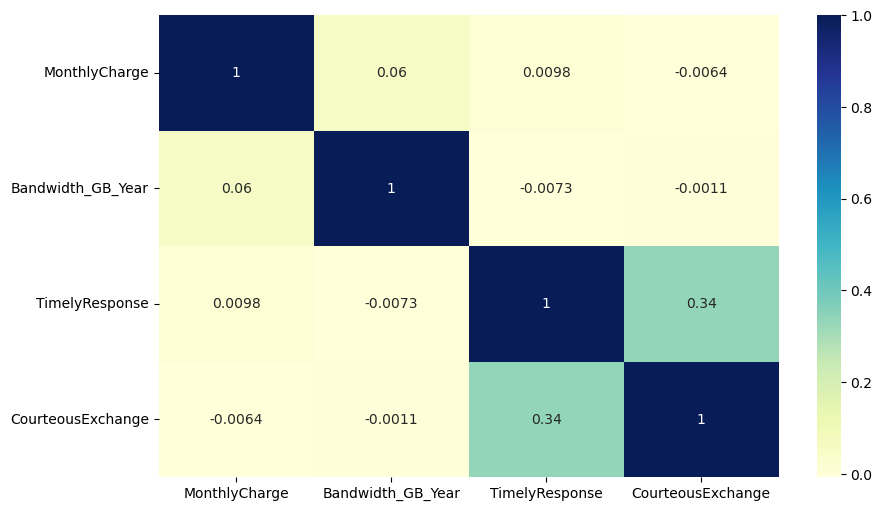

In [19]:
# Display heatmaps for bivariate analysis of correlation
plt.figure(figsize=(10,6))
sns.heatmap(df_bivariate.corr(), annot=True, cmap="YlGnBu")
plt.show()

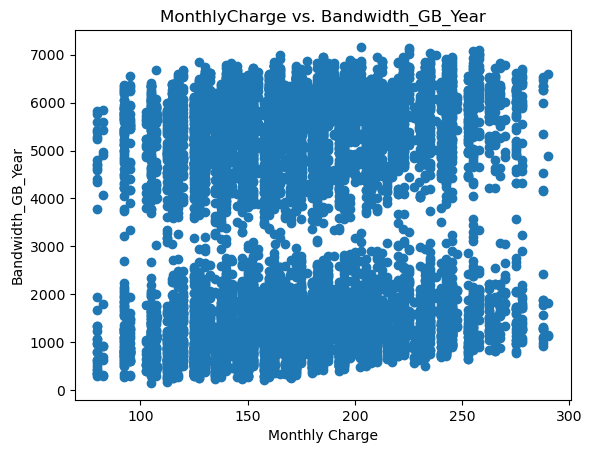

In [20]:
# Display the scatter plot of continuous variables.
plt.scatter(df_churn.MonthlyCharge, df_churn.Bandwidth_GB_Year)
plt.title('MonthlyCharge vs. Bandwidth_GB_Year')
plt.xlabel('Monthly Charge')
plt.ylabel('Bandwidth_GB_Year')
plt.savefig('bivariate_continuous.jpg')
plt.show()


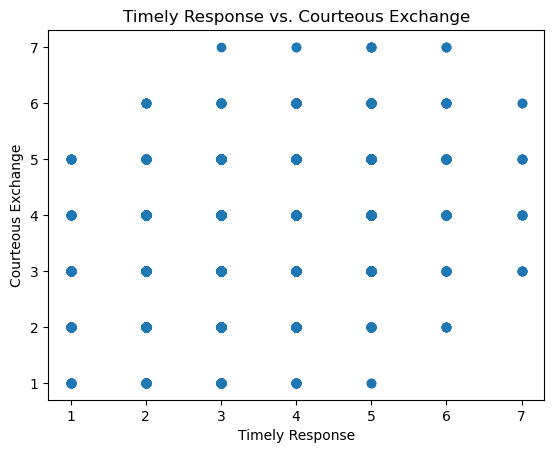

In [21]:
#Display the scatter plot of categorial variables.
plt.scatter(df_churn.TimelyResponse, df_churn.CourteousExchange)
plt.title('Timely Response vs. Courteous Exchange')
plt.xlabel('Timely Response')
plt.ylabel('Courteous Exchange')
plt.savefig('bivariate_categorial.jpg')
plt.show()


### E1. Results of Analysis:

From the analysis, we can see that the p-value is 0.6318335816054494 which is higher than the alpha = 0.05. So the analysis failed to reject the null hypothesis. Both the univariate statistics and bivariate statistics did not show the significant correlation between the variables.